# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>



### What you'll learn today

How to make time-series data comparable by resampling and converting to the same periodicity (e.g., from daily data to monthly data).

Fine-tuning the styling of Matplotlib charts by using limits, labels, linestyles, markers, colours, and the chart's resolution.

Using grids to help visually identify seasonality in a time series.

Finding the number of missing and NaN values and how to locate NaN values in a DataFrame.

How to work with Locators to better style the time axis on a chart

Review the concepts learned in the previous three days and apply them to new datasets

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# prompt: mount from google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('/content/drive/MyDrive/jupyter/data/75/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/content/drive/MyDrive/jupyter/data/75/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/drive/MyDrive/jupyter/data/75/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('/content/drive/MyDrive/jupyter/data/75/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
# time series data
df_tesla.head(3)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896


In [5]:
# time series data
df_unemployment.head(3)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8


In [6]:
print(f'Shape tesla data: {df_tesla.shape}')
print(f'Shape unemployment data: {df_unemployment.shape}')

Shape tesla data: (124, 3)
Shape unemployment data: (181, 3)


In [7]:
print(df_tesla.head(3))
print(df_tesla.describe())

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007


In [8]:
print(df_unemployment.head(3))
print(df_unemployment.describe())

     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000


In [9]:
print(f"Max unemployment rate: {df_unemployment.UNRATE.max()}")
print(f"Min unemployment rate: {df_unemployment.UNRATE.min()}")
print(f"Mean unemployment rate: {df_unemployment.UNRATE.mean()}")
print(f"Min unemployment rate: {df_unemployment.UNRATE.min()}")

Max unemployment rate: 10.0
Min unemployment rate: 3.7
Mean unemployment rate: 6.21767955801105
Min unemployment rate: 3.7


In [10]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [11]:
# prompt: get the tesla usd close from the largest web search in the tesla dataframe

df_tesla[df_tesla.TSLA_WEB_SEARCH == df_tesla.TSLA_WEB_SEARCH.max()]


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
123,2020-09-01,31,407.339996


### Bitcoin

In [12]:
print(df_btc_price.head(3))
print(df_btc_price.describe())

         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10


In [13]:
print(df_btc_search.head(3))
print(df_btc_search.describe())

     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000


In [14]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [17]:
# find if there are ANY NaN values (missing values) in a dataset
# isna() prints a dataframe with False/True for missing values or not. Values gets the values (as a stream)
# any() just looks for one single instance of NaN
print(f'Missing values for Tesla?: {df_btc_price.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_unemployment.isna().values.any()}')

Missing values for Tesla?: True
Missing values for U/E?: False
Missing values for BTC Search?: False


In [24]:
# you can sum True values to get a count of NaN values
# get the True/False dataframe with isna(), then count the True's
print(f'Missing values for BTC price?: {df_btc_price.isna().values.sum()}')
print('\n')

# find the dataframe with missing values
df_btc_price[df_btc_price.CLOSE.isna()]

Missing values for BTC price?: 2




,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [25]:
# prompt: find the number of values that are missing in df_btc_price dataframe
# you can find the number of missing values per column:
df_btc_price.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

**Challenge**: Remove any missing values that you found.

In [26]:
# remove missing values
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [30]:
# the head() function already returns the dtype of the column
# dtype = Object, means it is a string
print(f"dtype of Tesla: {df_tesla.MONTH.head(1)}")
print(f"dtype of Unemployment: {df_unemployment.MONTH.head(1)}")
print(f"dtype of BTC Search: {df_btc_search.MONTH.head(1)}")
print(f"dtype of BTC Price: {df_btc_price.DATE.head(1)}")

dtype of Tesla: 0    2010-06-01
Name: MONTH, dtype: object
dtype of Unemployment: 0    2004-01
Name: MONTH, dtype: object
dtype of BTC Search: 0    2014-09
Name: MONTH, dtype: object
dtype of BTC Price: 0    2014-09-17
Name: DATE, dtype: object


In [32]:
# convert to datetime
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [33]:
# check the conversion
print(df_tesla.MONTH.head(1))

0   2010-06-01
Name: MONTH, dtype: datetime64[ns]


## Resampling Time Series Data

Next, we have to think about how to make our Bitcoin price and our Bitcoin search volume comparable. Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.

To convert our daily data into monthly data, we're going to use the `.resample()` function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'.  If you ever need to resample a time series to a different frequency, you can find a list of different options here (for example 'Y' for yearly or 'T' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [34]:
df_btc_price.head(2)

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0


In [60]:
# convert from daily to monthly to make datasets comparable
# M is the sample frequency (condition). We want monthly frequency
# Other sample frequencies: Y = year, T = minute.
# last() gets the last value
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [40]:
print(df_btc_price[df_btc_price.DATE == "2014-10-31"])

# resamples, and gets the 'last month' datetime, but doesn't aggreggate the volume for the month (still remains daily volume)
df_btc_price.resample('M', on='DATE').last()

         DATE       CLOSE      VOLUME
44 2014-10-31  338.321014  12545400.0


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


In [45]:
# get the last close, and the sum of the monthly volume from a daily time series
# CLOSE is last, and VOLUME is sumed up in the agg function
monthly_data = df_btc_price.resample('M', on='DATE').agg({
    'CLOSE': 'last',
    'VOLUME': 'sum'
})

print(monthly_data.shape)
monthly_data

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,4.108810e+08
2014-10-31,338.321014,9.029944e+08
2014-11-30,378.046997,6.597334e+08
2014-12-31,320.192993,5.531023e+08
2015-01-31,217.464005,1.098812e+09
...,...,...
2020-05-31,9461.058594,1.286368e+12
2020-06-30,9137.993164,6.509133e+11
2020-07-31,11323.466797,5.458133e+11


In [44]:
# this example shows the operation above in a test (small dataframe)
df_test = df_btc_price.head(2)
df_test

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0


In [47]:
# get the last close, and the sum of the monthly volume from a daily time series
test = df_test.resample('M', on='DATE').agg({
    'CLOSE': 'last',
    'VOLUME': 'sum'
})

test

,CLOSE,VOLUME
DATE,,
2014-09-30,424.440002,55540000.0


# Data Visualisation

Let's create a basic line chart of the Tesla stock price and the search popularity and then gradually add more and more styling to our chart.
Challenge

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Here's what you're aiming for:

### Notebook Formatting & Style Helpers

In [48]:
import matplotlib.pyplot as plt


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

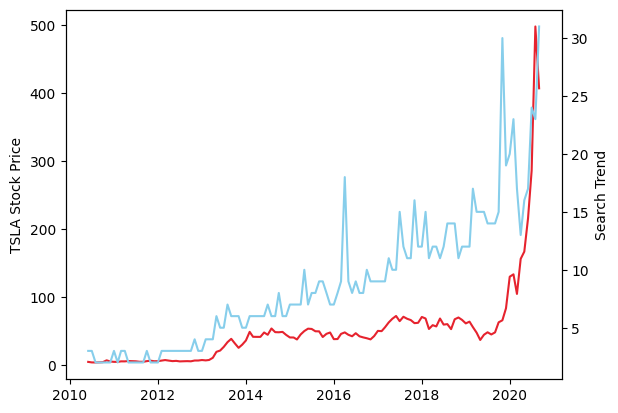

In [50]:
ax1 = plt.gca()   # get the current axis
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

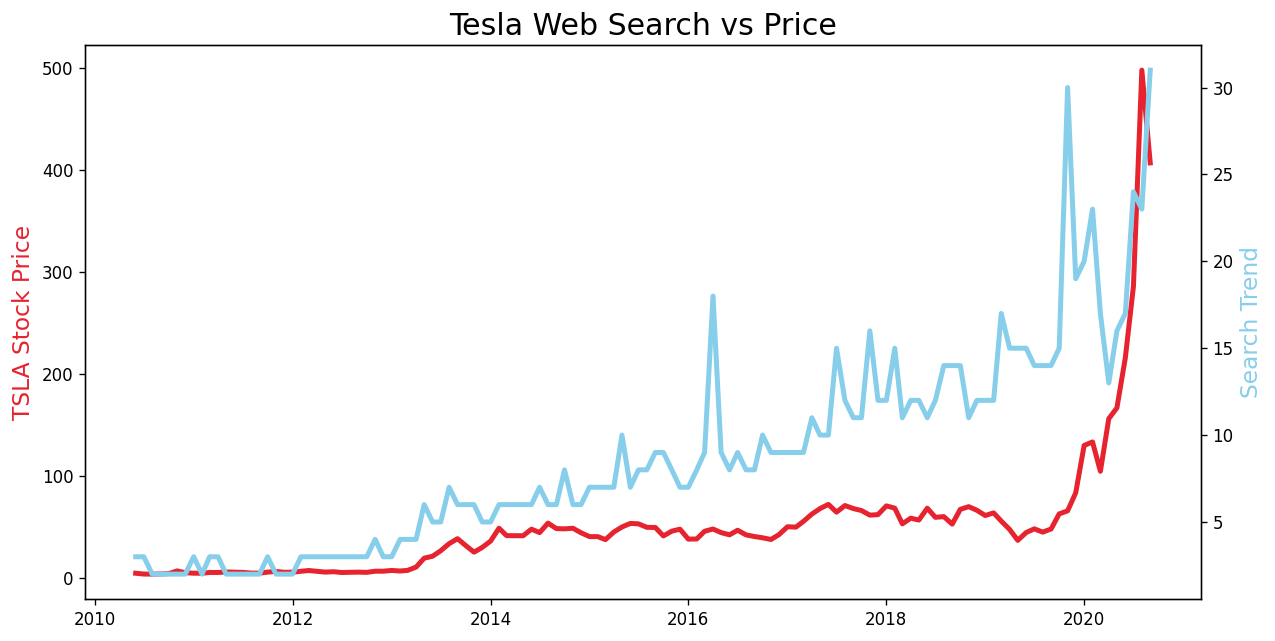

In [52]:
# adding styling to the chart
# increases size and resolution
plt.figure(figsize=(12,6), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Also, increase fontsize and linewidth for larger charts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

# Displays chart explicitly
plt.show()

How to add tick formatting for dates on the x-axis.

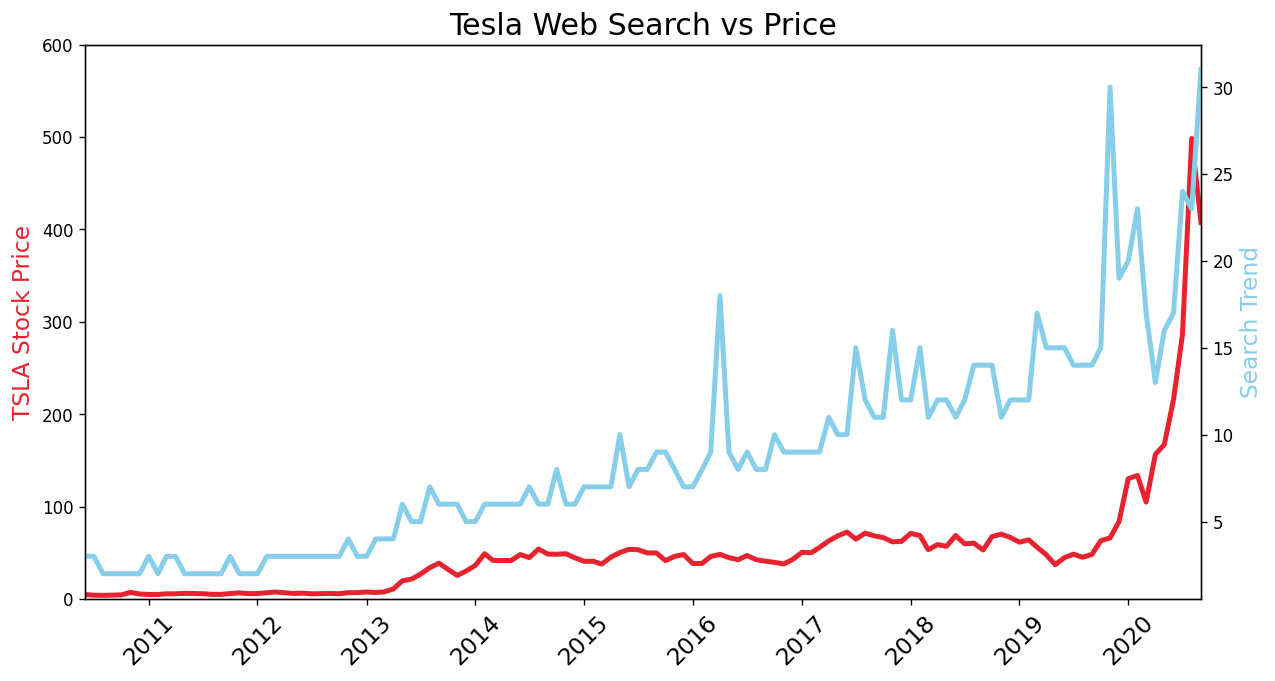

In [53]:
# adding x and y limits to the values
# set the max and min values for the axis based on the data
plt.figure(figsize=(12,6), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

In [54]:
import matplotlib.dates as mdates

In [55]:
# we are going to add x-axis tick marks
# create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

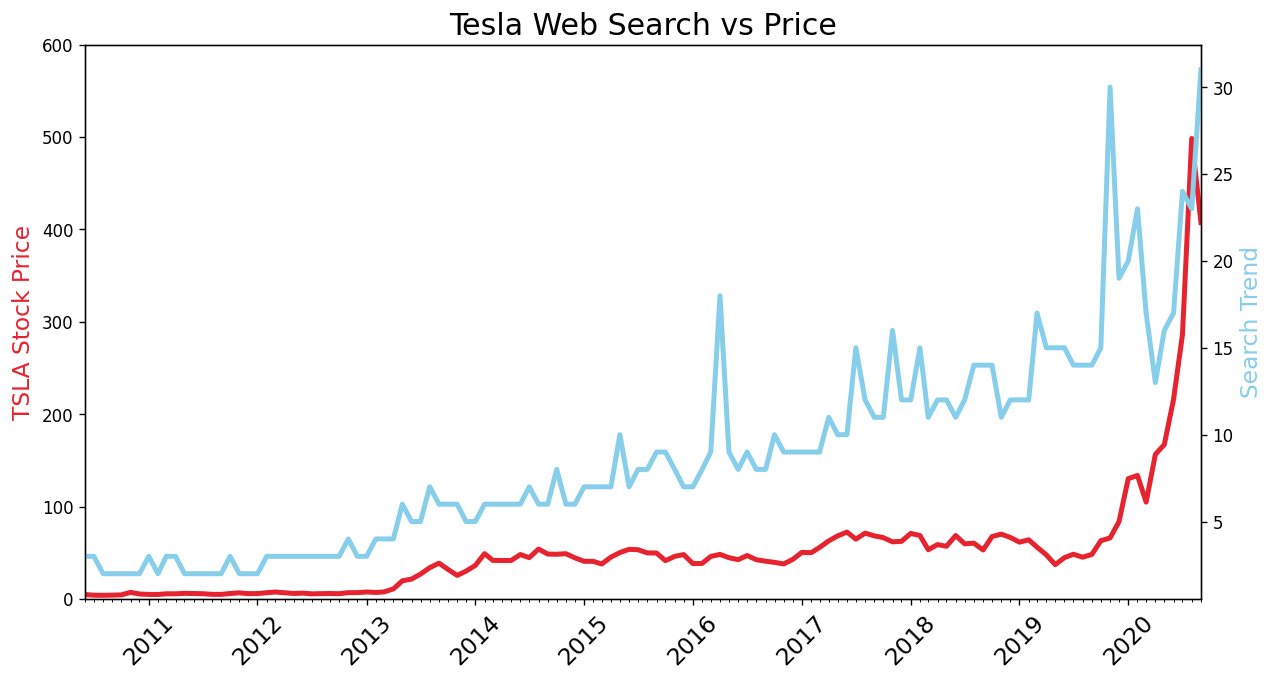

In [58]:
# adding x and y limits to the values
# set the max and min values for the axis based on the data
plt.figure(figsize=(12,6), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

When we take a look at our chart, we can see the tick marks nicely. The tick marks also allow us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled.

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

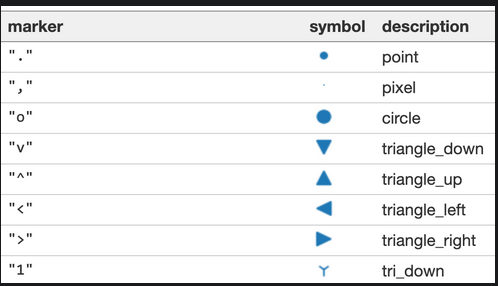

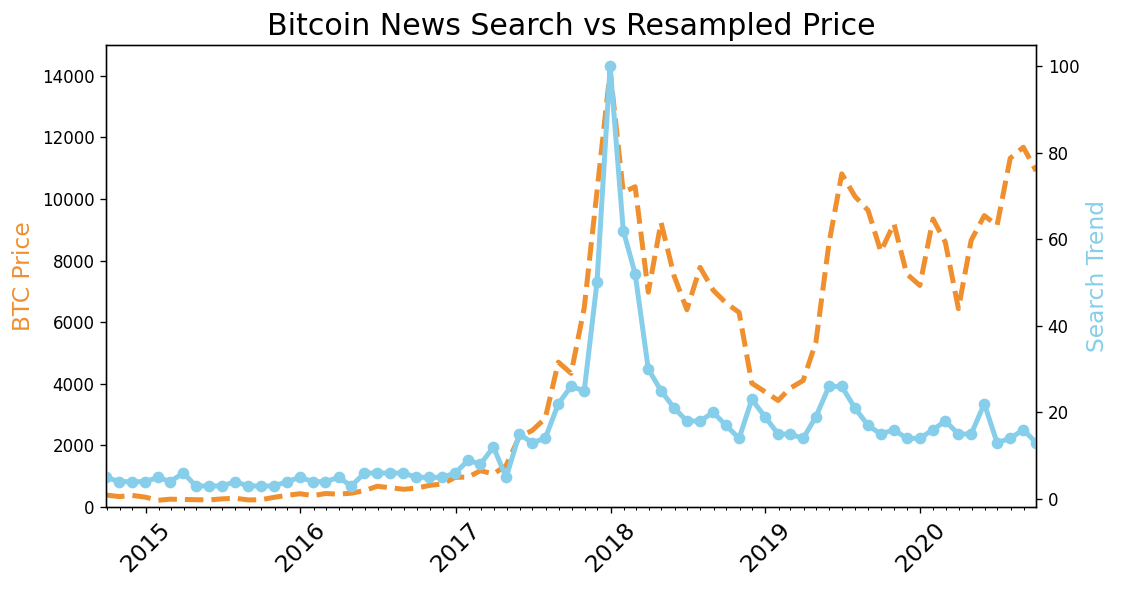

In [62]:
plt.figure(figsize=(10,5), dpi=120)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,
          color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH,
          color='skyblue', linewidth=3, marker='o')

plt.show()

What we see in the chart is that similar to Tesla, the crazy price movements in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

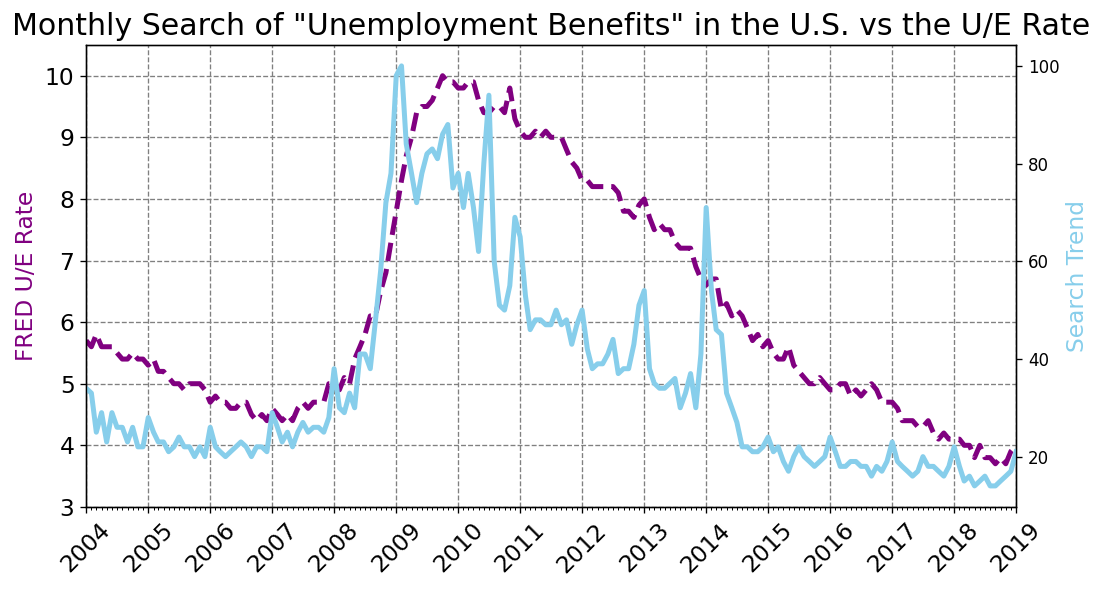

In [63]:
plt.figure(figsize=(10,5), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
          color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
          color='skyblue', linewidth=3)

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


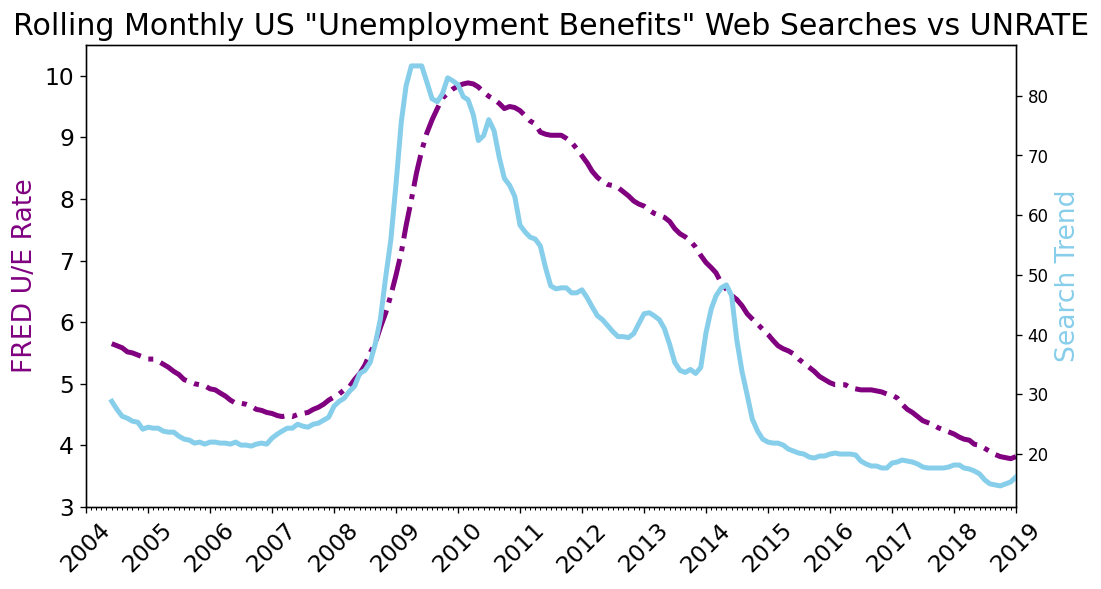

In [64]:
# rolling average (moving average)
plt.figure(figsize=(10,5), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

What is this telling us? We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator).

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [66]:
df_ue_2020 = pd.read_csv('/content/drive/MyDrive/jupyter/data/75/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

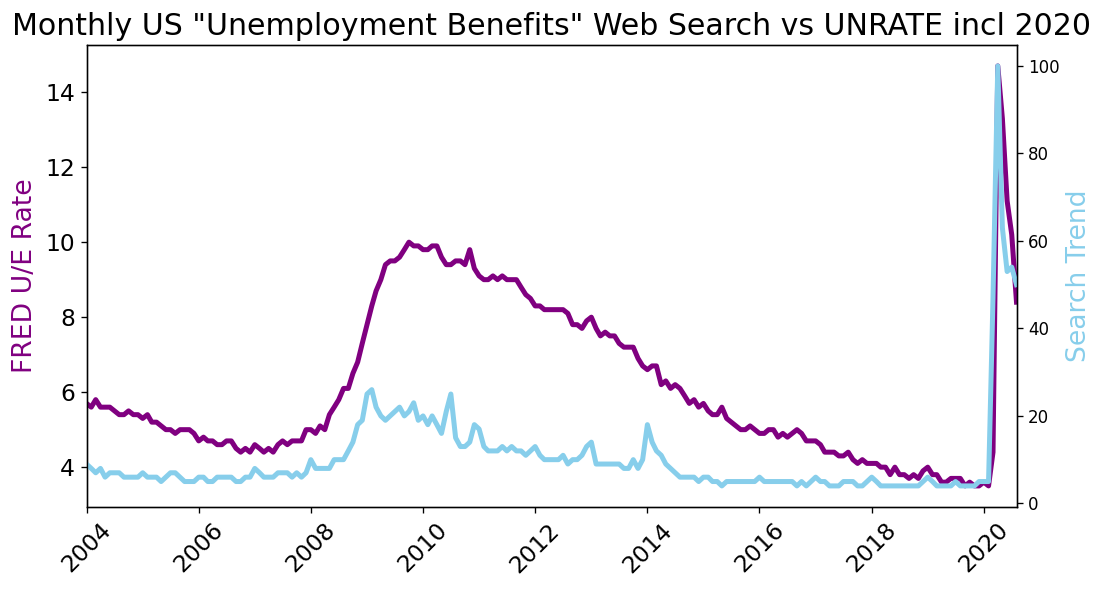

In [68]:
plt.figure(figsize=(10,5), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

What we see is not pretty. The US unemployment rate spiked to unprecedented levels during the COVID pandemic, dwarfing the levels seen during the financial crisis. Let's hope the recovery will be swifter this time.

# Learning Points & Summary

In this lesson we looked at how to:

* How to use .describe() to quickly see some descriptive statistics at a glance.

* How to use .resample() to make a time-series data comparable to another by changing the periodicity.

* How to work with matplotlib.dates Locators to better style a timeline (e.g., an axis on a chart).

* How to find the number of NaN values with .isna().values.sum()

*  How to change the resolution of a chart using the figure's dpi

* How to create dashed '--' and dotted '-.' lines using linestyles

* How to use different kinds of markers (e.g., 'o' or '^') on charts.

* Fine-tuning the styling of Matplotlib charts by using limits, labels, linewidth and colours (both in the form of named colours and HEX codes).

* Using .grid() to help visually identify seasonality in a time series.


You can download the completed code for today in this lesson.


